# Data Project 



Analysing data from the Global Abortion Incidence Dataset (https://osf.io/5k7fp/)

Imports: 

In [515]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import geopandas 

In [516]:
%matplotlib inline

Set the size of plots in inches:

In [517]:
plt.rcParams['figure.figsize'] = (10, 5)

In [518]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

Load CSV file: 

In [519]:
if os.path.isfile("global_abortion_incidence_dataset.csv"):
    filepath = "global_abortion_incidence_dataset.csv"
    print("loading from file")
else:
    filepath = "https://osf.io/6t4eh"
    print("loading from the internet")

df = pd.read_csv(filepath)
print("done")

loading from file
done


Finding out the kind of data columns in the dataset:

In [520]:
df.columns

Index(['country', 'iso', 'yearstart', 'yearend', 'region', 'subregion',
       'numberofabortions', 'abortionrate', 'perc_p_ending_in_a',
       'spontaneous', 'datatype', 'datasource', 'complete', 'classification',
       'modelused', 'marriedonly', 'notes'],
      dtype='object')

Row 1 data for reference provides: 

In [521]:
row_one = df.iloc[1]
row_one

country                                   Albania
iso                                           8.0
yearstart                                    1991
yearend                                      1991
region                Europe and Northern America
subregion                         Southern Europe
numberofabortions                         20300.0
abortionrate                                  NaN
perc_p_ending_in_a                            NaN
spontaneous                                    No
datatype                      Official Statistics
datasource                           Henshaw 2001
complete                               Incomplete
classification              Below survey of women
modelused                                     Yes
marriedonly                                   NaN
notes                                         NaN
Name: 1, dtype: object

## Analysis of participating subregions and countries: 

Analysis of the count of entries in regions or countries, across years, as a proxy to the level of participation and documentation of abortion incidences in these areas.

Text(0, 0.5, 'Count of entries')

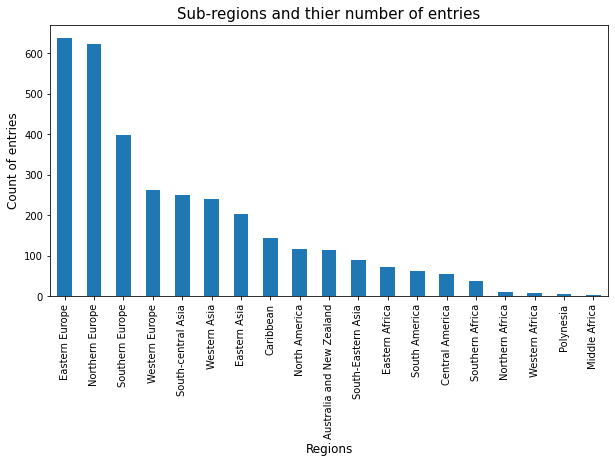

In [522]:
sub_v = df["subregion"].value_counts()
sub_v.plot(kind="bar")
plt.title("Sub-regions and thier number of entries", fontsize=15)
plt.xlabel('Regions', fontsize=12)
plt.ylabel('Count of entries', fontsize=12)

Countires with more than 50 entries in dataset:

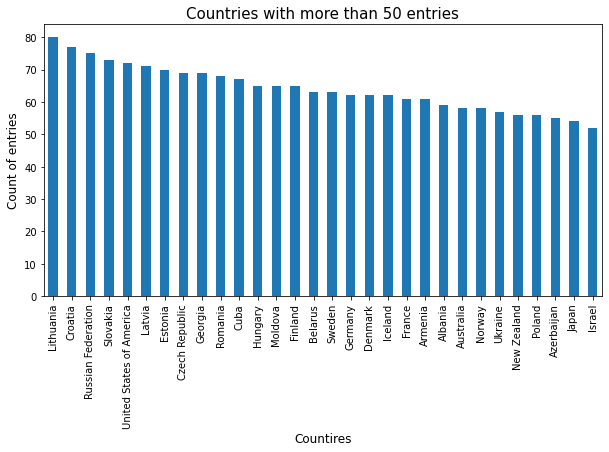

In [523]:
count_v = df["country"].value_counts()
count_v[count_v>50].plot(kind="bar")
plt.title("Countries with more than 50 entries", fontsize=15)
plt.xlabel('Countires', fontsize=12)
plt.ylabel('Count of entries', fontsize=12)
plt.rcParams['figure.figsize'] = (10, 5)

Countries with less than 10 entries in dataset

Text(0, 0.5, 'Count of entries')

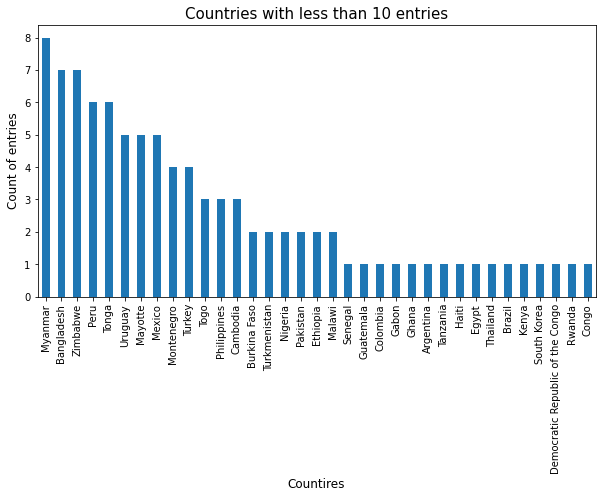

In [524]:
count_v[count_v<10].plot(kind="bar")
plt.title("Countries with less than 10 entries", fontsize=15)
plt.xlabel('Countires', fontsize=12)
plt.ylabel('Count of entries', fontsize=12)

Countries' entries to dataset have not been consistently provided across all years, the following visualises the consecutive entry of countries across years in the dataset.

In [525]:
country_data = []
for name, c_df in df.groupby("country"):
    country_data.append(
        {
            "country": name,
            "first_year": int(c_df.yearstart.min()),
            "last_year": int(c_df.yearstart.max()),
        }
    )
country_range = pd.DataFrame(country_data)


In [526]:
plt.rcParams['figure.figsize'] = (30, 30)

Text(0.5, 1.0, 'Years countries have participated')

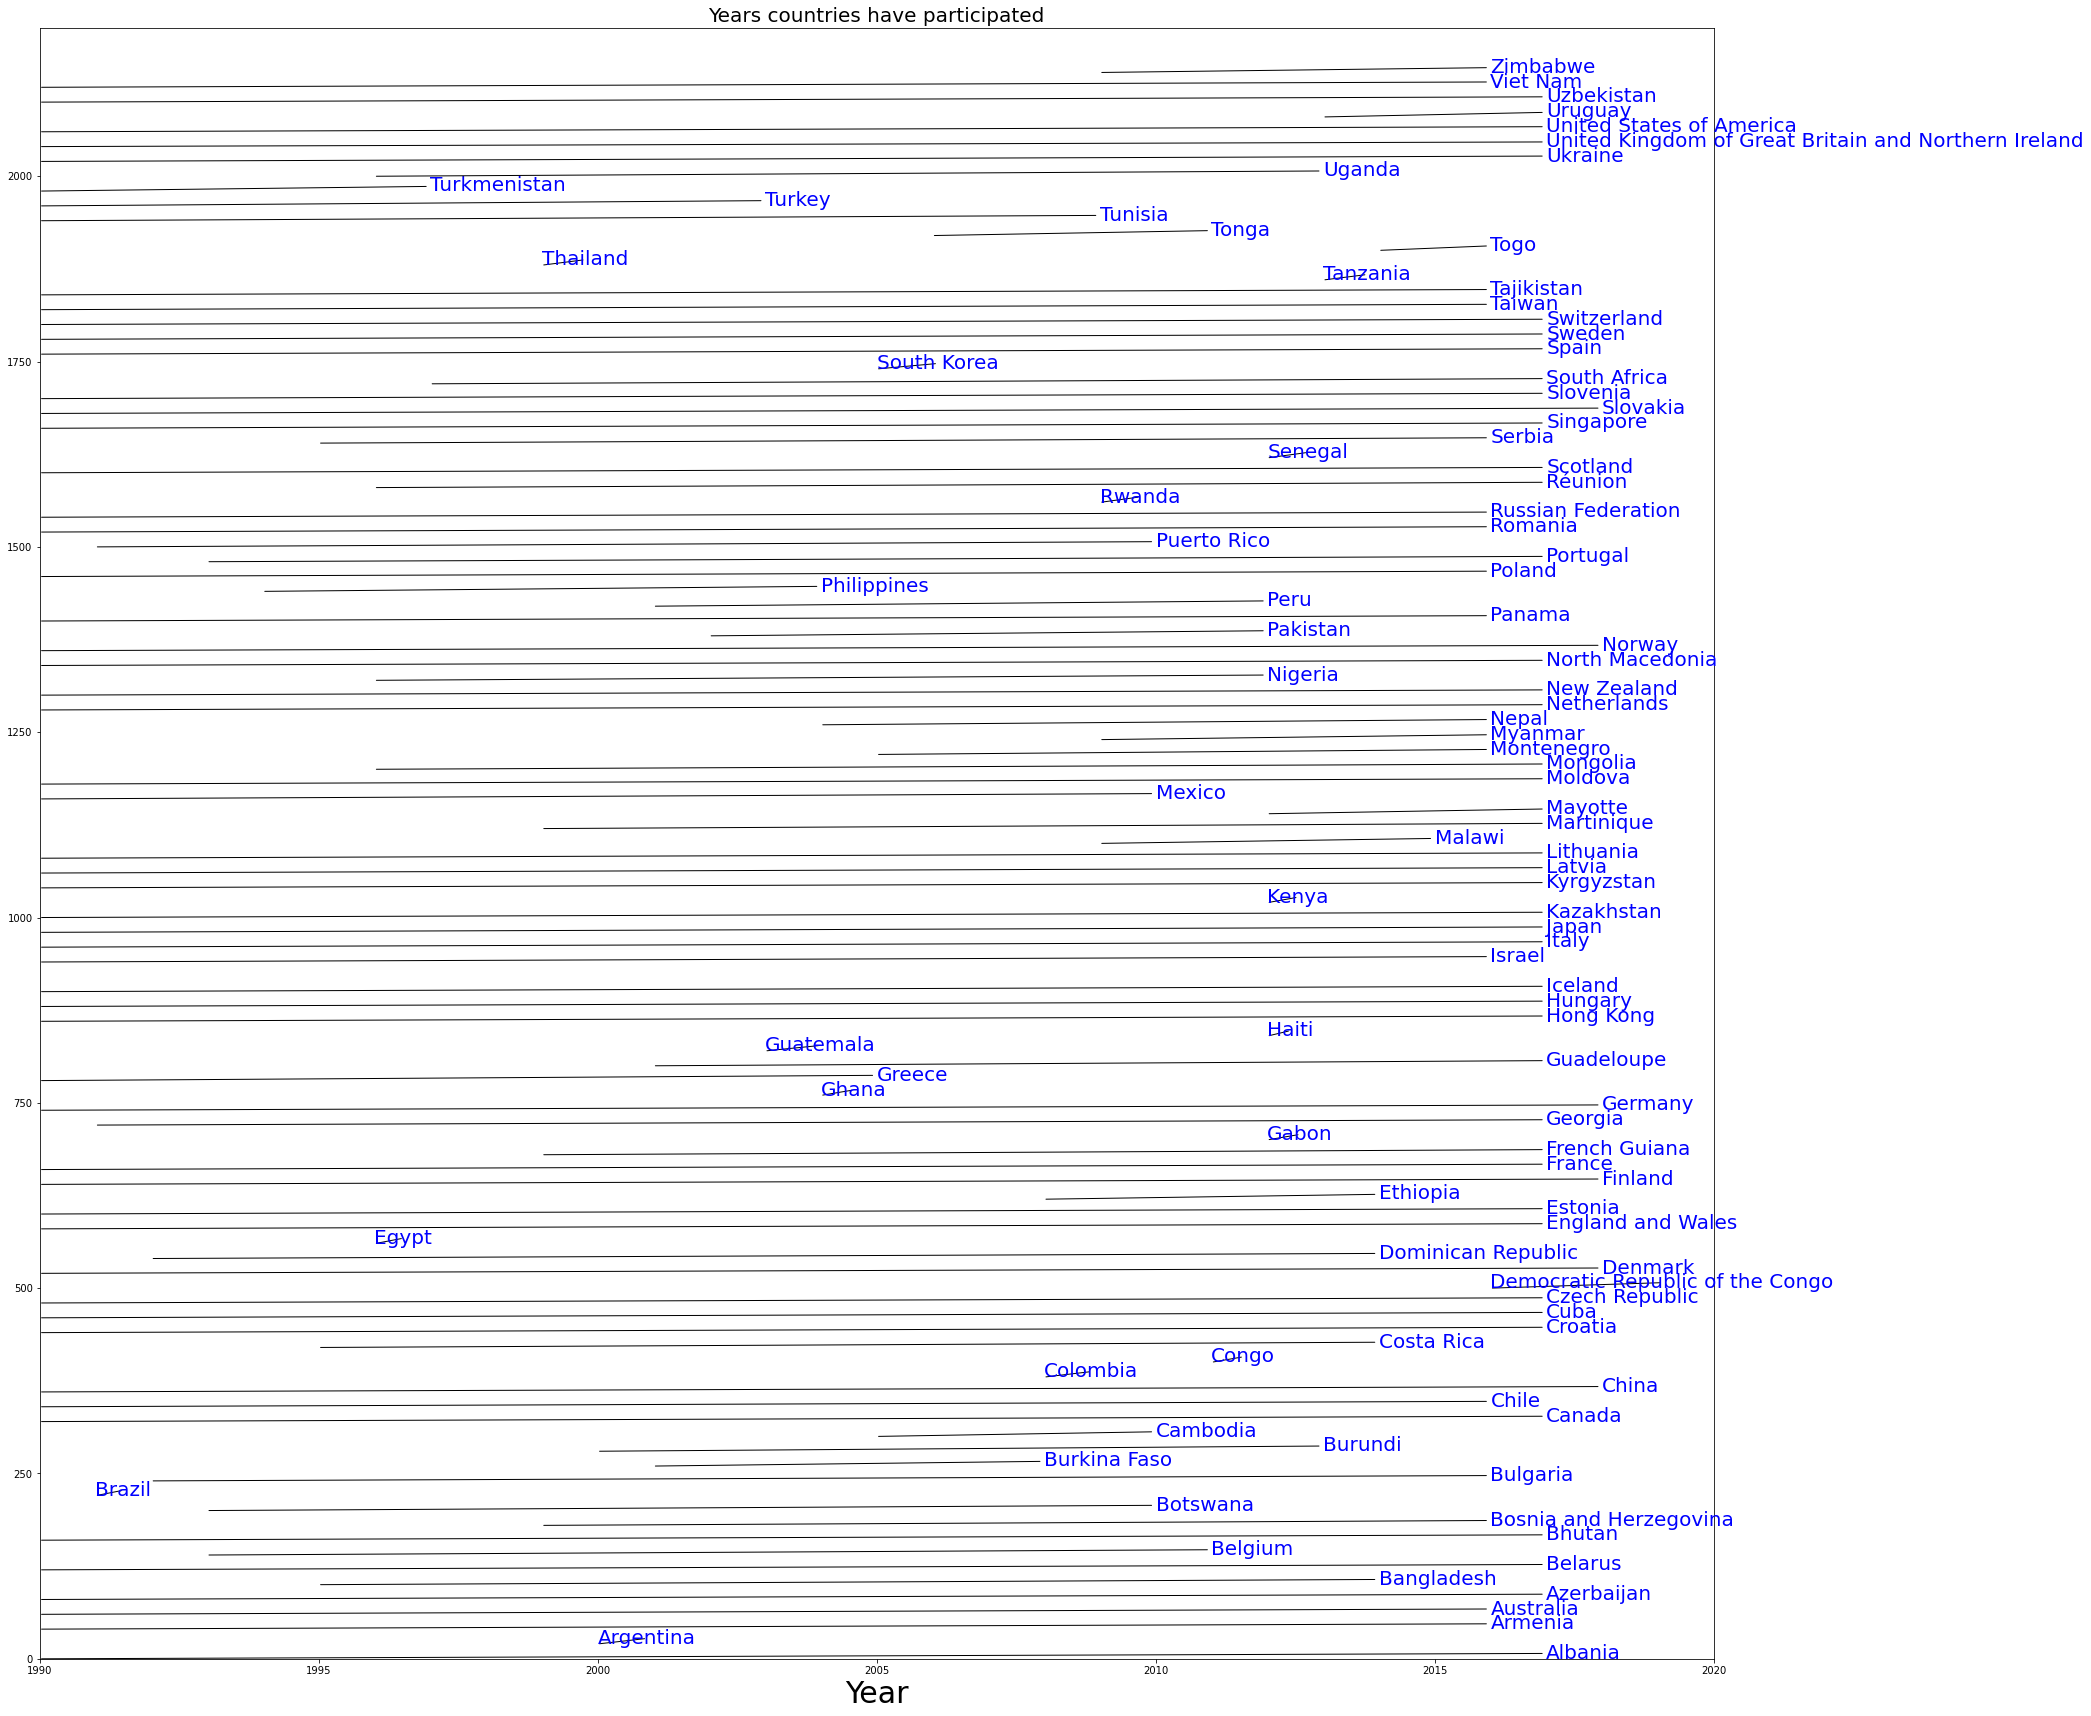

In [527]:
fig, ax = plt.subplots()
for i, row in country_range.iterrows():
    ax.annotate(
        row.country,
        xy=(row.first_year, i*20),
        xycoords="data",
        xytext=(row.last_year, i*20),
        textcoords="data",
        arrowprops=dict(arrowstyle="-"),
        size = 20,
        c = "blue"
    )
plt.xlim([1990,2020])
plt.ylim([0,2200])
plt.xlabel('Year', fontsize=30)
plt.title("Years countries have participated", fontsize=20)



## Analysing data type:

In [528]:
plt.rcParams['figure.figsize'] = (10, 5)

Analysis of entries by count of data type to see the ways in which entries are being collected

Text(0, 0.5, 'Count of entries')

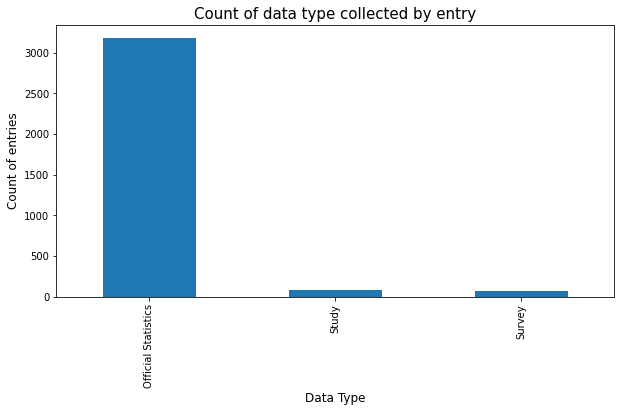

In [529]:
datatype_c= df["datatype"].value_counts()
datatype_c.plot(kind="bar")
plt.title("Count of data type collected by entry", fontsize=15)
plt.xlabel('Data Type', fontsize=12)
plt.ylabel('Count of entries', fontsize=12)


Analysis of the correlation of number of abortions to data type

Text(0, 0.5, 'No. of abortions')

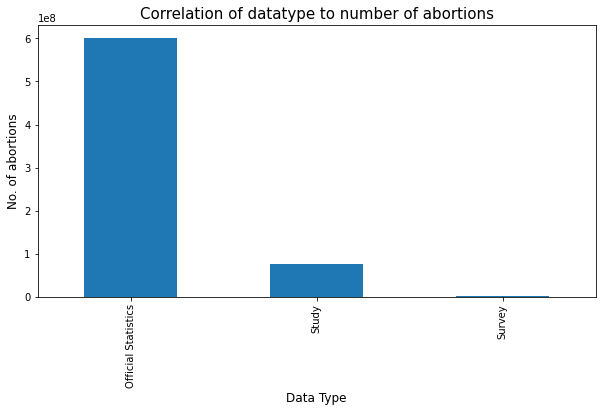

In [530]:
datatype_no = df.groupby(["datatype"])["numberofabortions"].sum()
datatype_no.plot(kind="bar")
plt.title("Correlation of datatype to number of abortions", fontsize=15)
plt.xlabel('Data Type', fontsize=12)
plt.ylabel('No. of abortions', fontsize=12)

Analysis of the number of abortions collected through various data types over years 

Text(0, 0.5, 'No. of abortions')

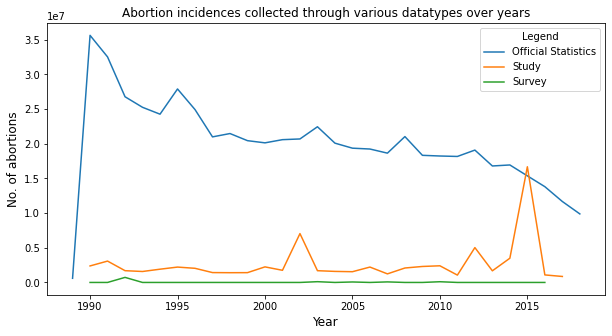

In [531]:
legend_labels = []
for datatype_name, sub_df in df.groupby("datatype"):
    sub_df.groupby("yearstart").sum().numberofabortions.plot()
    legend_labels.append(datatype_name)
plt.title("Abortion incidences collected through various datatypes over years")
plt.legend(legend_labels, title='Legend')
plt.xlabel('Year', fontsize=12)
plt.ylabel('No. of abortions', fontsize=12)

Text(0, 0.5, 'No. of abortions')

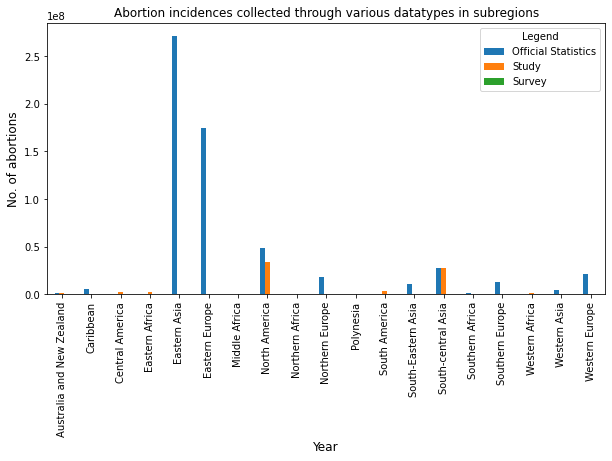

In [532]:
df.groupby(["subregion","datatype"])["numberofabortions"].sum().unstack().plot(kind="bar")
plt.title("Abortion incidences collected through various datatypes in subregions")
plt.legend(title='Legend')
plt.xlabel('Year', fontsize=12)
plt.ylabel('No. of abortions', fontsize=12)

Text(0, 0.5, 'No. of abortions')

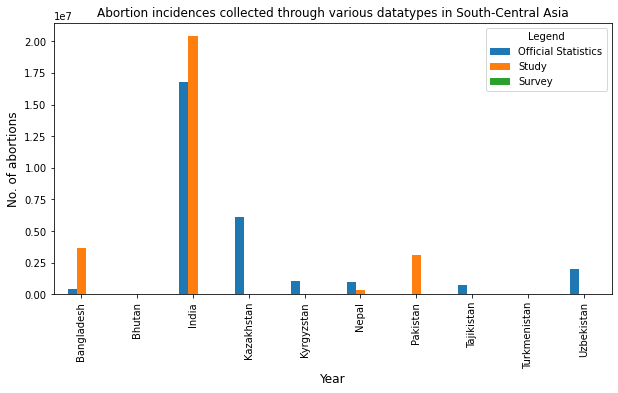

In [533]:
df_subregion = df[df.subregion=="South-central Asia"]
df_subregion.groupby(["country", "datatype"])["numberofabortions"].sum().unstack().plot(kind="bar")
plt.title("Abortion incidences collected through various datatypes in South-Central Asia")
plt.legend(title='Legend')
plt.xlabel('Year', fontsize=12)
plt.ylabel('No. of abortions', fontsize=12)

In [655]:
df_country=df[df.country=="India"]
datatype_dive=df_country.groupby(["yearstart", "datatype"]).sum()
datatype_dive

,,iso,yearend,numberofabortions,abortionrate,perc_p_ending_in_a
yearstart,datatype,,,,,
1989,Official Statistics,356.0,1990,596357.0,0.0,0.0
1990,Official Statistics,356.0,1990,596345.0,0.0,0.0
1991,Official Statistics,712.0,3983,1217671.0,0.0,0.0
1992,Official Statistics,356.0,1993,606015.0,0.0,0.0
1993,Official Statistics,356.0,1994,612291.0,0.0,0.0
1994,Official Statistics,356.0,1995,627748.0,0.0,0.0
1995,Official Statistics,712.0,3992,1141828.0,0.0,0.0
1996,Official Statistics,712.0,3994,1076150.0,0.0,0.0
1997,Official Statistics,712.0,3996,1025646.0,0.0,0.0


In [656]:
df_country.loc[df["datatype"] == "Study"]

,country,iso,yearstart,yearend,region,subregion,numberofabortions,abortionrate,perc_p_ending_in_a,spontaneous,datatype,datasource,complete,classification,modelused,marriedonly,notes
1501,India,356.0,2002,2002,Central and Southern Asia,South-central Asia,4800000.0,NaN,NaN,No,Study,Duggal and Ramachandran 2004,NaN,NaN,Yes,All women,NaN
1508,India,356.0,2015,2015,Central and Southern Asia,South-central Asia,15644748.0,47.0,NaN,No,Study,Singh et al 2018,NaN,NaN,Yes,All women,NaN


#### Introduction summary of study "The incidence of abortion and unintended pregnancy in India, 2015" by Susheela Singh et al.

"Reliable, current information on the incidence of induced abortion in India is not available... 

Statistics compiled by the Indian Government on the number of abortions provided in facilities are known to greatly underestimate abortion incidence because coverage of facility-based services is incomplete and in addition, many abortions occur outside of a facility setting... 

In some surveys, women in India are asked about abortion experience, but direct questions to women are known to result in very high under-reporting because of stigma... 

This evidence gap not only hinders the government's ability to design policies and programmes on reproductive health but also weakens global estimates of abortion incidence."

## Analysing abortion incidences:

Analysing number of abortion incidences by region

Text(0, 0.5, 'No of abortions')

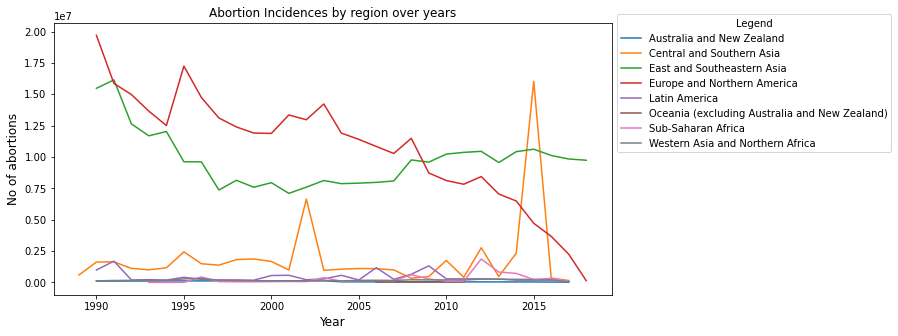

In [657]:
legend_labels = []
for region_name, sub_df in df.groupby("region"):
    sub_df.groupby("yearstart").sum().numberofabortions.plot()
    legend_labels.append(region_name)
plt.title("Abortion Incidences by region over years")
plt.legend(legend_labels, title='Legend', bbox_to_anchor=(1, 1.05))
plt.xlabel('Year', fontsize=12)
plt.ylabel('No of abortions', fontsize=12)


Analysing number of abortion incidences by subregion

Text(0, 0.5, 'No. of abortions')

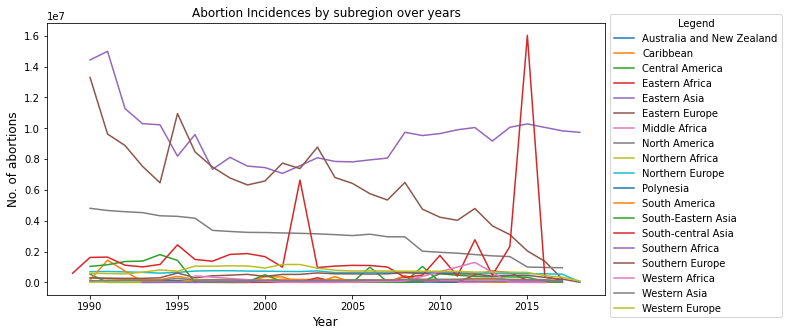

In [537]:
legend_labels = []
for region_name, sub_df in df.groupby("subregion"):
    sub_df.groupby("yearstart").sum().numberofabortions.plot()
    legend_labels.append(region_name)
plt.title("Abortion Incidences by subregion over years")
plt.legend(legend_labels, title='Legend', bbox_to_anchor=(1, 1.05))
plt.xlabel('Year', fontsize=12)
plt.ylabel('No. of abortions', fontsize=12)


Analysing number of abortion incidences by subregion normalised by only looking at 'Official Statistics'

Text(0, 0.5, 'No. of abortions')

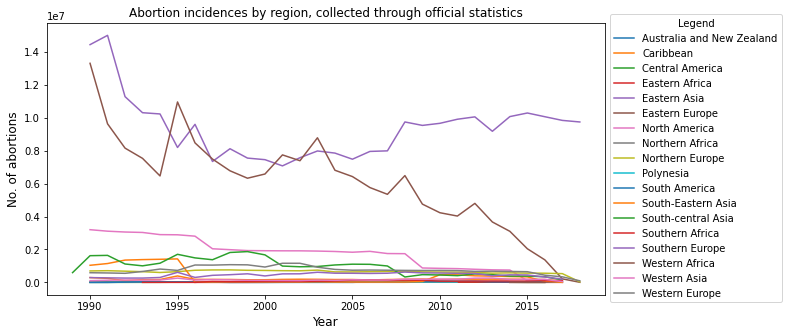

In [538]:
legend_labels = []
for region_name, sub_df in df[df.datatype=="Official Statistics"].groupby("subregion"):
    sub_df.groupby("yearstart").sum().numberofabortions.plot()
    legend_labels.append(region_name)
plt.title("Abortion incidences by region, collected through official statistics")
plt.legend(legend_labels, title='Legend', bbox_to_anchor=(1, 1.05))
plt.xlabel('Year', fontsize=12)
plt.ylabel('No. of abortions', fontsize=12)

By chart of abortion incidences by subregion

<AxesSubplot:xlabel='subregion'>

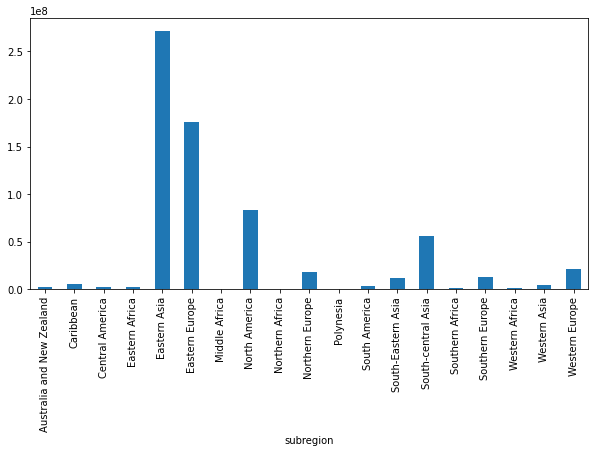

In [539]:
nabort_datatype = df.groupby(["subregion"])["numberofabortions"].sum()
nabort_datatype.plot(kind="bar")

Digging deeper into Eastern Asian countries

Text(0, 0.5, 'No. of abortions')

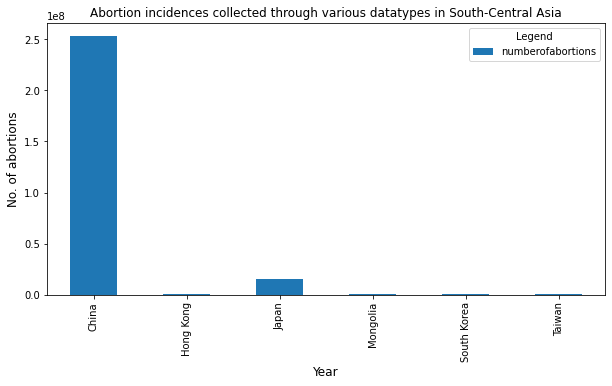

In [540]:
df_subregion = df[df.subregion=="Eastern Asia"]
df_subregion.groupby(["country"])["numberofabortions"].sum().plot(kind="bar")
plt.title("Abortion incidences collected through various datatypes in South-Central Asia")
plt.legend(title='Legend')
plt.xlabel('Year', fontsize=12)
plt.ylabel('No. of abortions', fontsize=12)

Plotting China's abortion incidences against the Eastern Asia region to see how much of the region's data is influenced by China

Text(0, 0.5, 'No. of abortions')

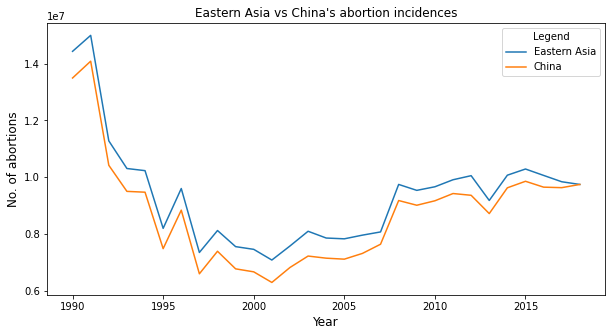

In [781]:
df[df.subregion == "Eastern Asia"].groupby(
    "yearstart"
).sum().numberofabortions.plot()

df[df.country == "China"].groupby(
    "yearstart"
).sum().numberofabortions.plot()

plt.title("Eastern Asia vs China's abortion incidences")
plt.legend(["Eastern Asia", "China"], title='Legend')
plt.xlabel('Year', fontsize=12)
plt.ylabel('No. of abortions', fontsize=12)

Plotting USA's abortion incidences against the North America region to see how much of the region's data is influenced by USA

Text(0, 0.5, 'No. of abortions')

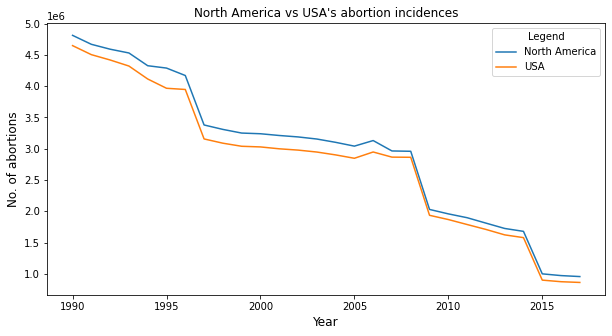

In [856]:
df[df.subregion == "North America"].groupby(
    "yearstart"
).sum().numberofabortions.plot()

df[df.country == "United States of America"].groupby(
    "yearstart"
).sum().numberofabortions.plot()

plt.title("North America vs USA's abortion incidences")
plt.legend(["North America", "USA"], title='Legend')
plt.xlabel('Year', fontsize=12)
plt.ylabel('No. of abortions', fontsize=12)

## Normalising abortion incidences with population data:

Importing new population dataset over years and slicing down to China and USA

In [868]:
pop_df = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_4413579.csv")

columns = ["Country Name"]
years = []
for i in range(1990,2015):
    years.append(str(i))
columns = columns + years

pop_df_cutdown = pop_df.loc[(pop_df["Country Name"] == "China") | (pop_df["Country Name"] == "United States")].loc[:, columns]
pop_df_cutdown

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
40,China,1.135185e+09,1.150780e+09,1.164970e+09,1.178440e+09,1.191835e+09,1.204855e+09,1.217550e+09,1.230075e+09,1.241935e+09,...,1.303720e+09,1.311020e+09,1.317885e+09,1.324655e+09,1.331260e+09,1.337705e+09,1.345035e+09,1.354190e+09,1.363240e+09,1.371860e+09
251,United States,2.496230e+08,2.529810e+08,2.565140e+08,2.599190e+08,2.631260e+08,2.662780e+08,2.693940e+08,2.726570e+08,2.758540e+08,...,2.955166e+08,2.983799e+08,3.012312e+08,3.040940e+08,3.067715e+08,3.093271e+08,3.115835e+08,3.138777e+08,3.160599e+08,3.183863e+08


Plotting China and USA's population over years 

(0.0, 1500000000.0)

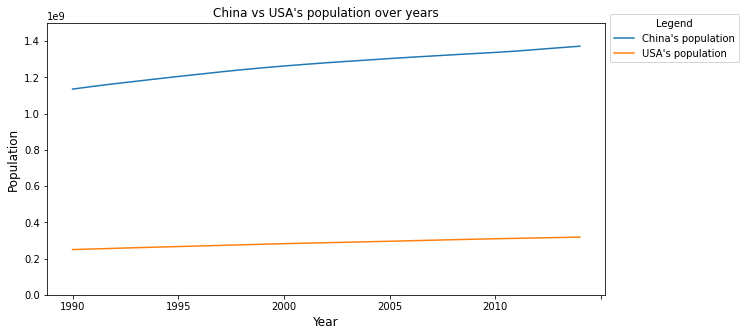

In [874]:
df_china_pop = pop_df_cutdown[pop_df_cutdown["Country Name"] == "China"].transpose().reset_index().rename(columns={"index": "year", 40: "pop"}).drop(0).reset_index(drop=True)
df_usa_pop = pop_df_cutdown[pop_df_cutdown["Country Name"] == "United States"].transpose().reset_index().rename(columns={"index": "year", 251: "pop2"}).drop(0).reset_index(drop=True)

df_vs_pop = pop_df_cutdown.transpose().reset_index().rename(columns={"index": "year", 40: "pop"}).drop(0).reset_index(drop=True)
df_vs_pop.plot(x="year")

plt.title("China vs USA's population over years")
plt.legend(["China's population", "USA's population"], title="Legend", bbox_to_anchor=(1, 1.05))
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.ylim([0, 1.5e+09])

Plotting abortion rate in population (abortion incidences/ population) of China and USA

(0.004, 0.02)

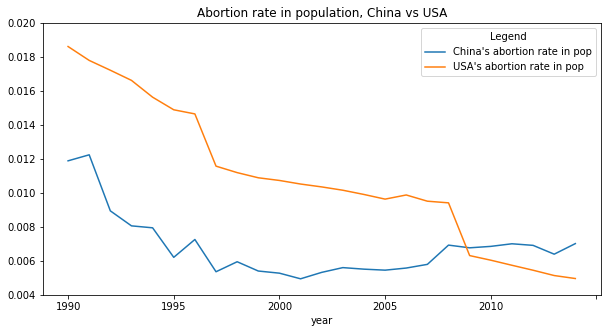

In [919]:
fig, ax = plt.subplots()

df_china_abortion = df[df.country == "China"].groupby("yearstart").sum().numberofabortions.reset_index().iloc[:-4 , :]
df_china_pop["normalised_abortions"] = df_china_abortion["numberofabortions"].div(df_china_pop["pop"])
df_china_pop.plot(x='year',y='normalised_abortions',ax = ax)

df_usa_abortion = df[df.country == "United States of America"].groupby("yearstart").sum().numberofabortions.reset_index().iloc[:-3 , :]
df_usa_pop["normalised_abortions"] = df_usa_abortion["numberofabortions"].div(df_usa_pop["pop2"])
df_usa_pop.plot(x='year',y='normalised_abortions', ax = ax)

plt.title("Abortion rate in population, China vs USA")
plt.legend(["China's abortion rate in pop", "USA's abortion rate in pop"], title="Legend", bbox_to_anchor=(1, 1))
plt.ylim([0.004, 0.020])

#### Summary of findings

Although USA's abortion rate in its population has historically been higher than China's, the rates start to converge in the late 2000s and switches onwards, with China's abortion rate trending higher than the USA's.